In [ ]:
# add to the path as if we are in the regular src/ directory
import os
import sys
import pathlib
path_here = os.path.abspath(os.getcwd())
parent_path = pathlib.PurePath(path_here).parent
sys.path.append(str(parent_path))
print(f"Inserting {parent_path} into the path")

from datetime import datetime
from time import sleep
from random import random
import matplotlib.pyplot as plt
plt.ion()

from env.env import GymHandler
from trainers.base_trainer import Trainer
from agents.policy_gradient import Agent_PPO, MLPActorCriticPG

Inserting /home_nfs/Luke/motion-predictor/src into the path


In [2]:
device = "cpu"
log_level = 1
rngseed = None
render = False

# make the environment
env = GymHandler("Walker2d-v5")

# make the network for the agent
layers = [128 for i in range(2)]
network = MLPActorCriticPG(env.obs_dim, env.act_dim, hidden_sizes=layers,
                            continous_actions=True)

# make the agent
agent = Agent_PPO(device=device)
agent.init(network)

# create the trainer
trainer = Trainer(agent, env, rngseed=rngseed, log_level=log_level,
                  device=device, render=render, plot=True,
                  episode_log_rate=50)

Trainer settings:
 -> Run name: run_16-40
 -> Group name: 2025-02-11
 -> Given seed: None
 -> Training reproducible: False
 -> Using device: cpu
 -> Save enabled: True
 -> Save path: models/2025-02-11/


Saving file models/2025-02-11/run_16-40/Trainer_params_001.lz4 with pickle ... finished
Saving file models/2025-02-11/run_16-40/Tracking_info.lz4 with pickle ... finished
Saving file models/2025-02-11/run_16-40/Agent_PPO_001.lz4 with pickle ... finished
Trainer hyperparameters:

{'num_episodes': 1000
 'test_freq': 200
 'save_freq': 200
 'use_curriculum': False
 'rngseed': 487864237
 'training_reproducible': False
 'saving_enabled': True}

Agent hyperparameters:

{'learning_rate_pi': 1e-05
 'learning_rate_vf': 1e-05
 'gamma': 0.99
 'steps_per_epoch': 4000
 'clip_ratio': 0.2
 'train_pi_iters': 10
 'train_vf_iters': 10
 'lam': 0.97
 'target_kl': 0.01
 'max_kl_ratio': 1.5
 'use_random_action_noise': True
 'random_action_noise_size': 0.1
 'optimiser': 'adam'
 'use_kl_penalty': False
 'use_entropy_regularisation': False
 'kl_penalty_coefficient': 0.2
 'entropy_coefficient': 0.0001
 'adam_beta1': 0.9
 'adam_beta2': 0.999
 'grad_clamp_value': None
 'network_name': 'MLPActorCriticPG_128x128'}



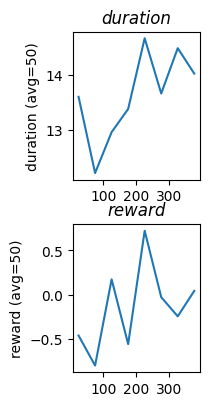

(2, 1)
Episode 50 training metrics:
 -> duration = 12.000
 -> reward = -1.215

Begin training episode 51
Episode 100 training metrics:
 -> duration = 13.000
 -> reward = 2.332

Begin training episode 101
Episode 150 training metrics:
 -> duration = 12.000
 -> reward = 1.255

Begin training episode 151
Episode 200 training metrics:
 -> duration = 16.000
 -> reward = 1.629

Begin training episode 201
Episode 250 training metrics:
 -> duration = 15.000
 -> reward = 0.359

Begin training episode 251
Episode 300 training metrics:
 -> duration = 7.000
 -> reward = -3.104

Begin training episode 301
Episode 350 training metrics:
 -> duration = 14.000
 -> reward = 1.844

Begin training episode 351
Episode 400 training metrics:
 -> duration = 29.000
 -> reward = 10.041

Begin training episode 401
Episode 450 training metrics:
 -> duration = 19.000
 -> reward = 1.385

Begin training episode 451


KeyboardInterrupt: 

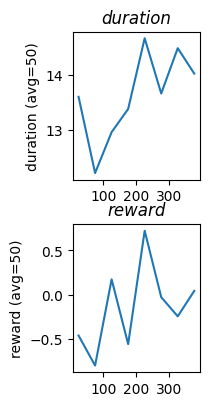

In [3]:
# run the training
trainer.train()